**Comparação das curvas sigmoide evento x não evento**<br>
*By Luiza B. Laquini*

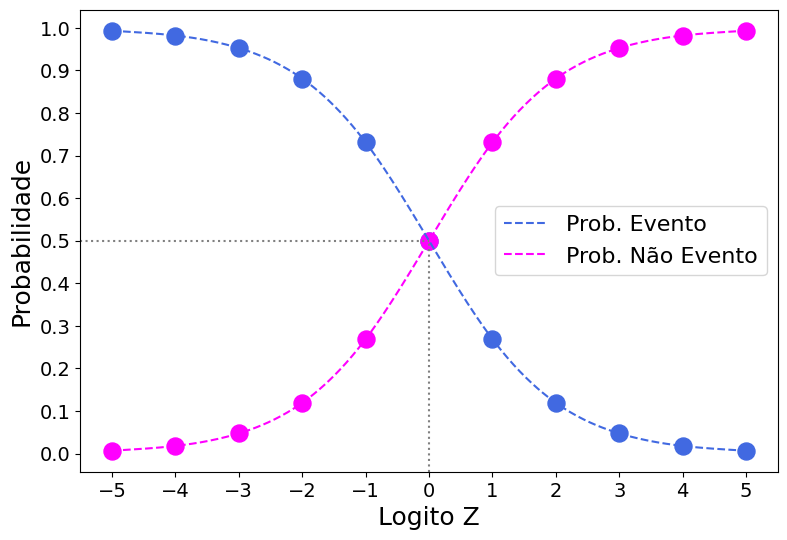

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.interpolate import UnivariateSpline 

# Estabelecendo a função para a probabilidade de ocorrência de um evento
def prob_evento(z):
    return 1 / (1 + exp(z))

# Estabelecendo a função para a probabilidade de ocorrência de um não evento
def prob_nao_evento(z):
    return 1 / (1 + exp(-z))

# Gerar dados para a curva sigmoide de um evento e não evento
logitos = np.arange(-5, 6)

# Função para gerar dataframe com probabilidades interpoladas do evento
def curva_evento(logitos):
    probs = [prob_evento(i) for i in logitos]
    df = pd.DataFrame({'logito': logitos, 'probs': probs})
    spline = UnivariateSpline(df['logito'], df['probs'], s=0)
    logitos_smooth = np.linspace(df['logito'].min(), df['logito'].max(), 500)
    probs_smooth = spline(logitos_smooth)
    return df, logitos_smooth, probs_smooth

# Função para gerar dataframe com probabilidades interpoladas do não evento
def curva_nao_evento(logitos):
    probs = [prob_nao_evento(i) for i in logitos]
    df = pd.DataFrame({'logito': logitos, 'probs': probs})
    spline = UnivariateSpline(df['logito'], df['probs'], s=0)
    logitos_smooth = np.linspace(df['logito'].min(), df['logito'].max(), 500)
    probs_smooth = spline(logitos_smooth)
    return df, logitos_smooth, probs_smooth

# Curva para o Evento
df_evento, logitos_smooth_evento, probs_smooth_evento = curva_evento(logitos)

# Curva para o Não Evento
df_nao_evento, logitos_smooth_nao_evento, probs_smooth_nao_evento = curva_nao_evento(logitos)

# Plotar ambas as curvas no mesmo gráfico
plt.figure(figsize=(9, 6))

# Curva do Evento
plt.plot(logitos_smooth_evento, probs_smooth_evento, color='royalblue', linestyle='--', label='Prob. Evento')
plt.scatter(df_evento['logito'], df_evento['probs'], color='royalblue', marker='o', s=150)

# Curva do Não Evento
plt.plot(logitos_smooth_nao_evento, probs_smooth_nao_evento, color='magenta', linestyle='--', label='Prob. Não Evento')
plt.scatter(df_nao_evento['logito'], df_nao_evento['probs'], color='magenta', marker='o', s=150)

# Linhas horizontais e verticais
plt.axhline(y=df_evento.probs.mean(), color='grey', linestyle=':', xmax=0.5)
plt.axvline(x=0, color='grey', linestyle=':', ymax=0.5)

# Labels e ajustes visuais
plt.xlabel("Logito Z", fontsize=18)
plt.ylabel("Probabilidade", fontsize=18)
plt.xticks(np.arange(-5, 6), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.legend(fontsize=16, loc='center right')

plt.show()


Uma é a inversa da outra! Sempre se cruzam ao meio (prob = 50%)